# Data Visualization Workshop

Based on material from Sophia and Eric, so big thanks to them!


<br>

When you see data or studies be referenced by a newscaster, politician, or some other public figure, they tend not to point to the actual data sets or the logs of information. Rather, they will make use of pie charts, bar graphs, histograms, and many different kinds of graphs in order to concisely summarize large sums of data and quickly draw conclusions.

Granted, while people or groups can use graphs to deceive the public in an attempt to give their views more credibility (from omitting data points to adjusting graph scales), the point still stands: graphs are a great way to provide a visual representation of data.

*Side note: below is required to use Colab. Change the second box to be the folder that you are using.*

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd "/content/drive/My Drive/Colab Notebooks/ADSC Workshops/Visualization/"

/content/drive/My Drive/Colab Notebooks/ADSC Workshops/Visualization


# Part 1: Matplotlib

To get started, let's import ```numpy``` and ```pandas``` from last time, but also include a new library: ```matplotlib.pyplot```.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display

Matplotlib is far and away the most popular data visualization tool in Python. It's used all across the Python spectrum, from academic purposes to the workforce, and many other data visualization libraries in Python build on top of the work of Matplotlib, including Seaborn!

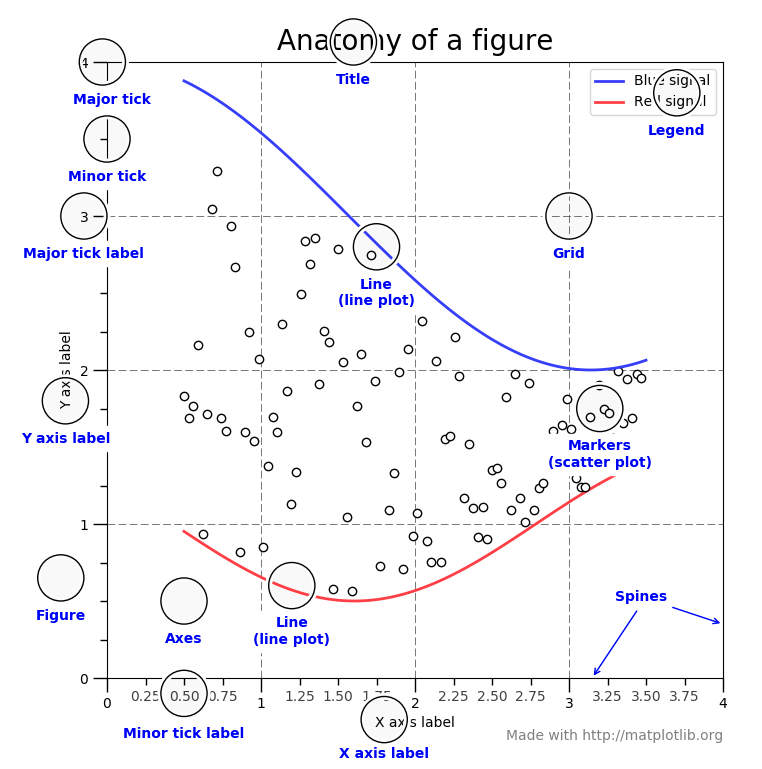

In [13]:
IPython.display.Image('matplotlib.png')

## Part 1.1: Matplotlib Terminology + Line Graphs

If you have an array of data, this can be easily plotted by calling ```plt``` in the ```matplotlib``` library. The example below is a basic example of a line graph:

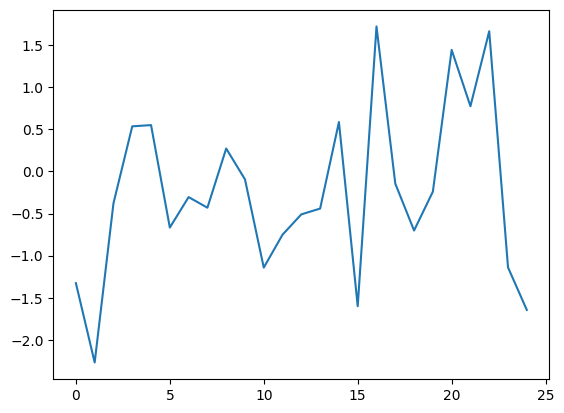

In [14]:
randoData = np.random.normal(0, 1, [25])

plt.plot(randoData)

Notice that by default, if you call ```plot()```, it *can* take in just one parameter: the y value. Under this case, it makes the assumption that your x-values start at 0 and increment by one each time.

However, if we want to manually input our values, we can do so as well. Just remember that if we do this using two parameters, the first parameter is our **x** value, and the second parameter is our **y** value.

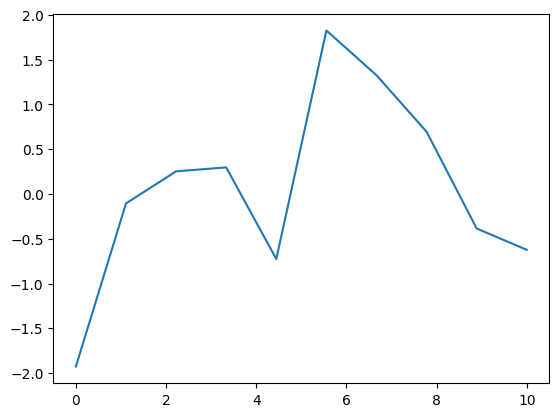

In [15]:
x=np.linspace(0,10,10)
y=np.random.normal(0,1,[10])
plt.plot(x, y)

One more thing to note from above: if we do choose to have an ```x``` and ```y``` parameters, then the number of values (lengths) of ```x``` and ```y``` *must* be the same. If not, then our program will raise an exception (and why wouldn't it? If you had eleven x values, but only ten y values, then how do you know what x value is going to be left without a corresponding y value?)

To change the color of a line in a plot, just call ```color``` or ```c``` as a parameter.

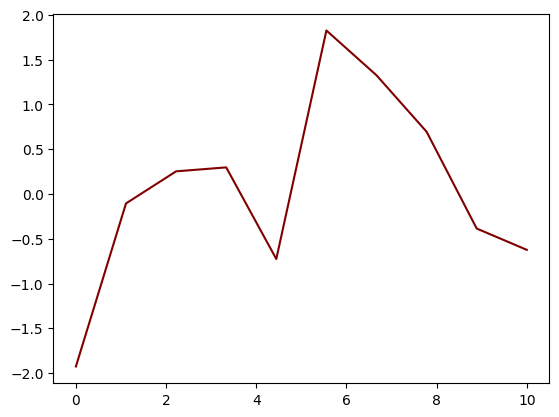

In [16]:
plt.plot(x, y, color="maroon")
# The code below should yield the same result
# plt.plot(x, y, c="maroon")

We can call a scatter plot by calling ```.scatter()```. Just like ```.plot()```, it can take in both an ```x``` and ```y``` parameter, and just like the ```x``` and ```y``` parameters in ```.plot()```, both must be of the same length. We can also change the color of each scatterplot entry by using ```color``` as a parameter, and we can change the marker by calling ```marker``` as a parameter.

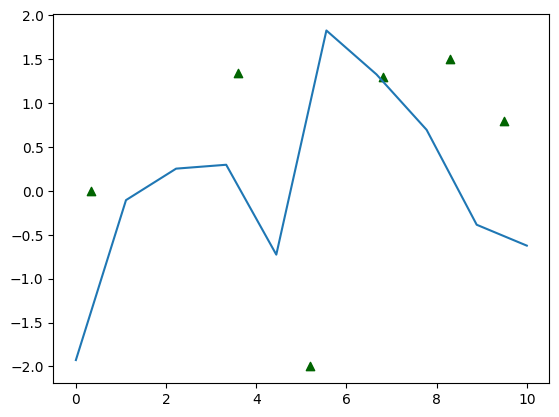

In [17]:
plt.plot(x, y)
plt.scatter([8.3, 6.8, 5.2, 0.34, 9.5, 3.6], [1.5, 1.3, -2, 0, 0.8, 1.34], color='darkgreen', marker='^')

By default, matplotlib will establish an x-limit and a y-limit such that all entries in a graph will fit nicely. However, that might not be suitable at times (for example: a line graph where most values have a corresponding y-value in between -2 and 2, but we have a single value that's greater than 10,000). Alternatively, we might want to be able to zoom into a portion of a graph.

That's where ```.xlim()``` and ```.ylim()``` come in. Both take in two parameters: the first creates the lower bounds, and the second creates the upper bounds.

In the example below, if we wanted to zoom into the x-values between 0 and 5, and zoom into the y-values between -0.5 and 0.5, we can do it like so:

(-0.5, 0.5)

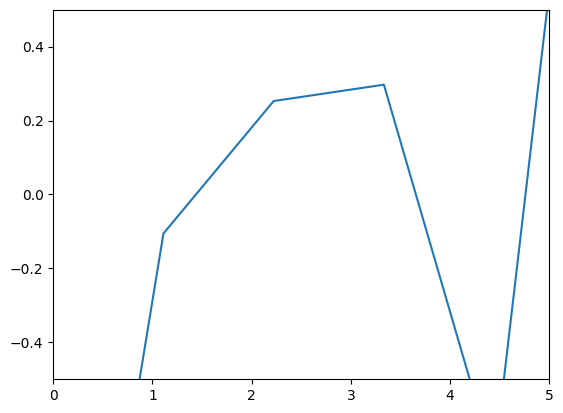

In [18]:
plt.plot(x, y)
plt.xlim(0,5)
plt.ylim(-0.5,0.5)

The information we presented is really cool so far, but even if we were to plot some points and slap that onto a lab report, we'd still likely get points taken off for our graphs. It might not be because of faulty data or because we plotted our points incorrectly, but rather, we're missing our title and our axis labels!

To add a title and axis labels, we can call them with ```.title()```, ```.xlabel()```, and ```.ylabel()```. They all take in a single parameter: a string with the title/label name you want.

Text(0, 0.5, 'My y-axis')

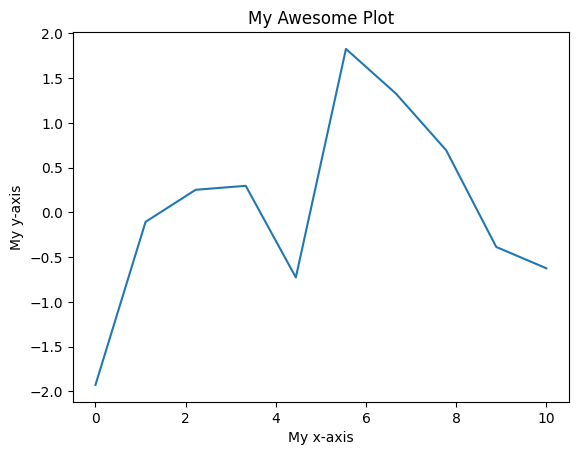

In [19]:
plt.plot(x, y)
plt.title('My Awesome Plot')
plt.xlabel('My x-axis')
plt.ylabel('My y-axis')

Challenge time: what if we want to plot multiple lines on a single graph? The nice thing about matplotlib is that this is entirely possible! In fact, you don't have to do any extra steps! You can just call ```.plot()``` for all plots you want on a single graph, and show the results!

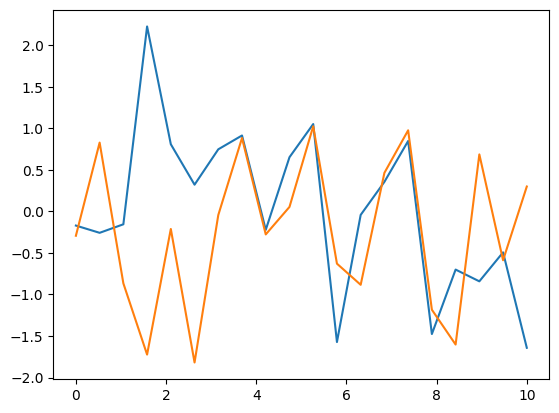

In [20]:
x=np.linspace(0,10,20)
y1=np.random.normal(0,1,[20])
y2=np.random.normal(0,1,[20])
plt.plot(x, y1)
plt.plot(x, y2)

That's cool, but how do I know which line is which? You might already know the answer to this, but you likely won't be so confident once we introduce more lines. We can solve this by calling ```label``` as a parameter inside of ```.plot()```... right?

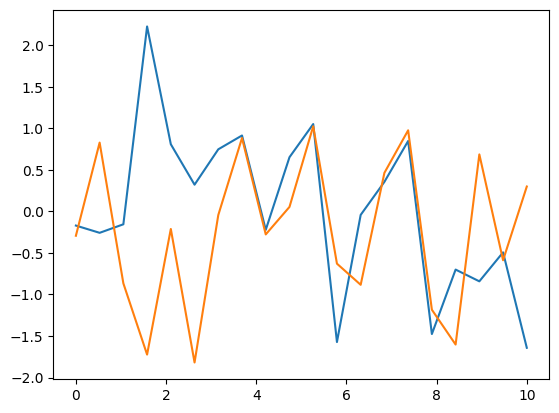

In [21]:
plt.plot(x, y1, label='Uno')
plt.plot(x, y2, label='Dos')

...not quite. Sure, we assigned labels to each line, but to the average viewer, they won't be able to distinguish between which line is which. Instead, to show the labels, we need to call ```.legend()``` (with the parantheses because this is a function, but there are no parameters needed for it).

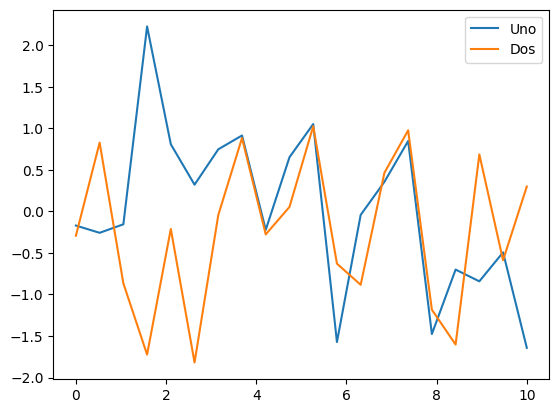

In [22]:
plt.plot(x, y1, label='Uno')
plt.plot(x, y2, label='Dos')
plt.legend()

Now we know how to graph several line plots on a single graph. Now let's flip the script: what if I want to have multiple line plots on separate graphs?

Before we answer that, we can use subplots. An example of a singular subplot on a figure is shown below.

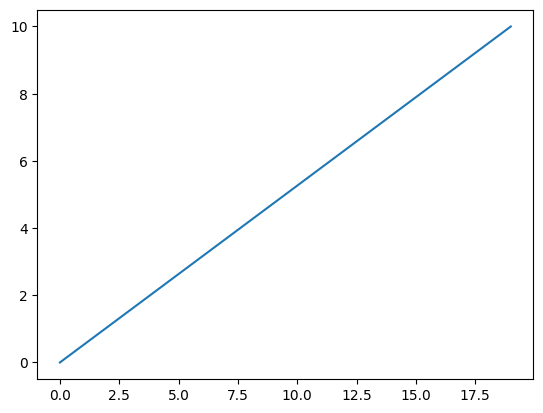

In [23]:
fig = plt.figure()  # an empty figure with no axes
ax = fig.add_subplot() # give it an axes
ax.plot(x) # add the plot

If we want multiple subplots, we can adjust the number of subplots we want with the first two parameters. The ```.subplots()``` function creates a "matrix" of plots, with the first two parameters deciding how many rows and columns of plots we want, respectively.

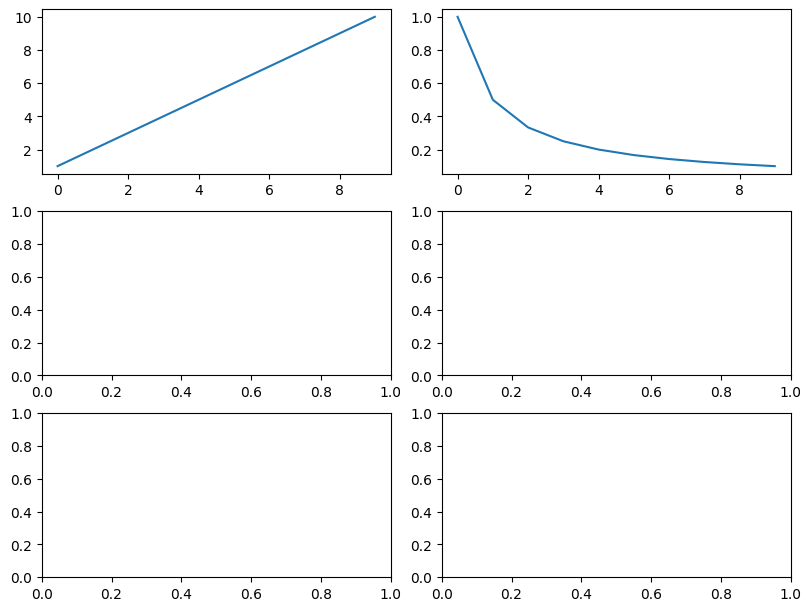

In [24]:
fig, ax = plt.subplots(3, 2, constrained_layout = True, figsize = (8, 6)) # 4 empty subfigure with a 2x2 grid of Axes

## access the axes with slicing
x=np.linspace(1,10,10)
ax[0,0].plot(x)
ax[0,1].plot(1 / x)

Well, that's really cool, but we can also use it to be able to graph lines or actual equations, too! To do this, we can use ```linspace``` (remember this from the ```numpy``` library?) to create an array of values subdivided into smaller increments.

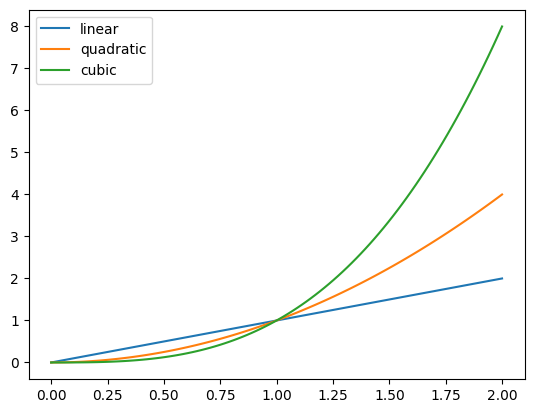

In [25]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.legend()

## Part 1.2: Scatter Plot

In [26]:
house = pd.read_csv('bcs.csv')
house.head(5)

,Price,Sqft,Baths,Location
0,2400,4918,4.5,"Bryan, TX"
1,680,3645,3.0,"Bryan, TX"
2,570,1900,2.0,"Bryan, TX"
3,400,3123,3.5,"Bryan, TX"
4,320,2365,3.0,"Bryan, TX"


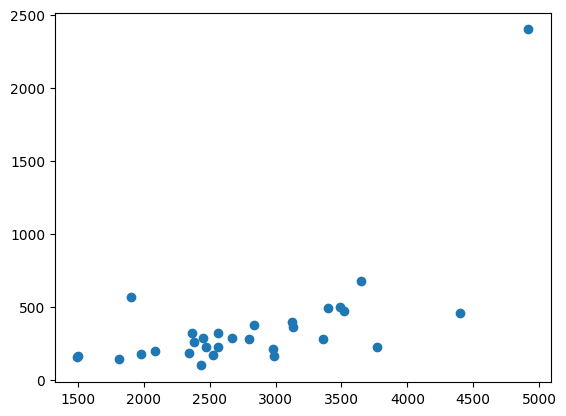

In [27]:
plt.scatter(house['Sqft'], house['Price'])

In [28]:
house = house[house['Price'] < 1000]
house.head(5)

,Price,Sqft,Baths,Location
1,680,3645,3.0,"Bryan, TX"
2,570,1900,2.0,"Bryan, TX"
3,400,3123,3.5,"Bryan, TX"
4,320,2365,3.0,"Bryan, TX"
5,280,3361,3.0,"Bryan, TX"


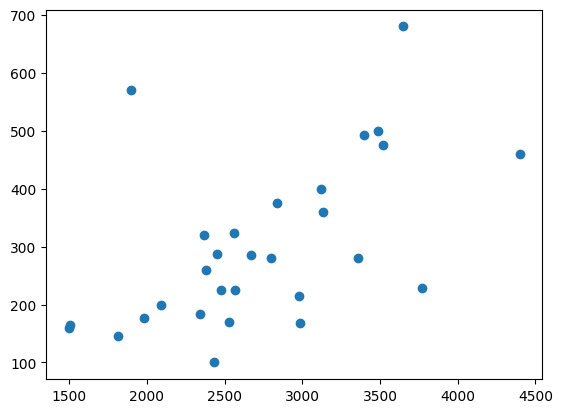

In [29]:
plt.scatter(house['Sqft'], house['Price'])

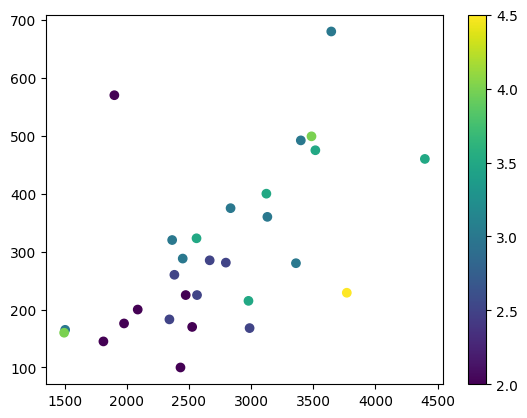

In [30]:
plt.scatter(x=house['Sqft'], y=house['Price'], c=house['Baths'])
plt.colorbar()
plt.show()

In [31]:
bryan = house[house['Location'] == "Bryan, TX"]
cstat = house[house['Location'] == "College Station, TX"]
cstat.head(5)

,Price,Sqft,Baths,Location
15,499,3486,4.0,"College Station, TX"
16,492,3400,3.0,"College Station, TX"
17,475,3517,3.5,"College Station, TX"
18,460,4398,3.5,"College Station, TX"
19,375,2835,3.0,"College Station, TX"


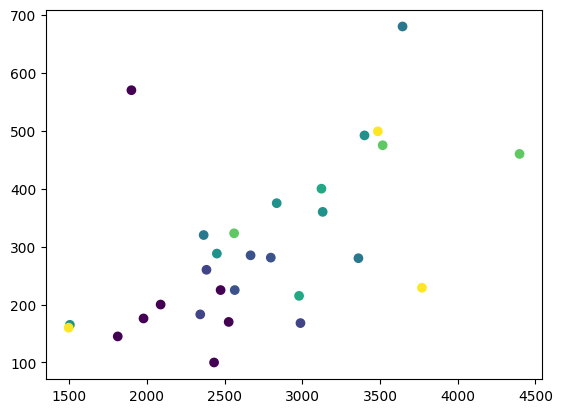

In [32]:
plt.scatter(x=cstat['Sqft'], y=cstat['Price'], c=cstat['Baths'])
plt.scatter(x=bryan['Sqft'], y=bryan['Price'], c=bryan['Baths'])
plt.show()

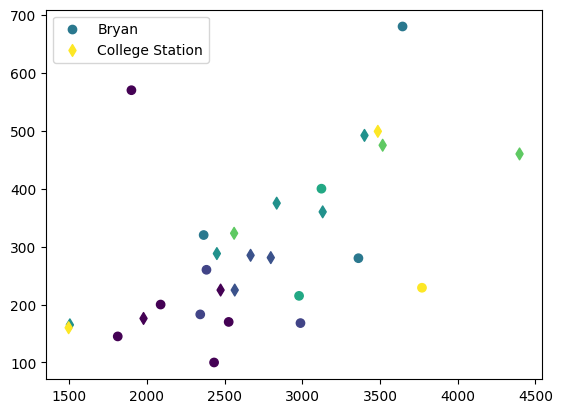

In [33]:
plt.scatter(x=bryan['Sqft'], y=bryan['Price'], c=bryan['Baths'], marker='o')
plt.scatter(x=cstat['Sqft'], y=cstat['Price'], c=cstat['Baths'], marker='d')
plt.legend(['Bryan', 'College Station'])
plt.show()

## Part 1.3: Histograms

In [34]:
boston = pd.read_csv('2019-boston-marathon-results.csv')
boston.head(5)

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
0,1,30,M,Kenya,2:07:57,7677,1,KEN
1,2,29,M,Ethiopia,2:07:59,7679,2,ETH
2,3,34,M,Kenya,2:08:07,7687,3,KEN
3,4,32,M,Kenya,2:08:54,7734,4,KEN
4,5,26,M,Kenya,2:08:55,7735,5,KEN


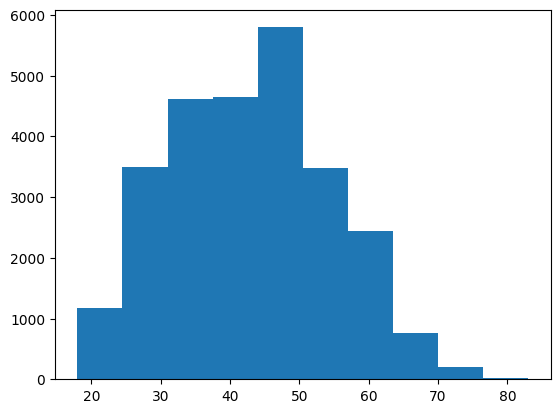

In [35]:
plt.hist(boston['Age'])
plt.show()

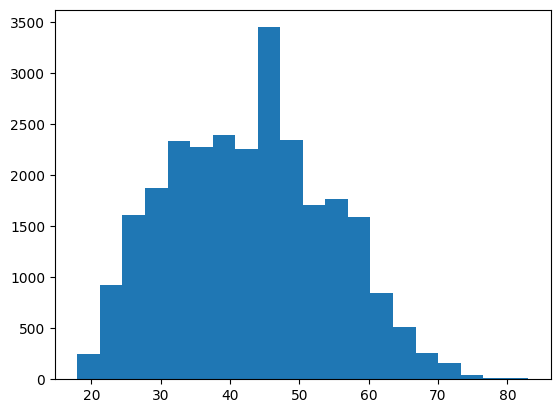

In [36]:
plt.hist(boston['Age'], bins=20)
plt.show()

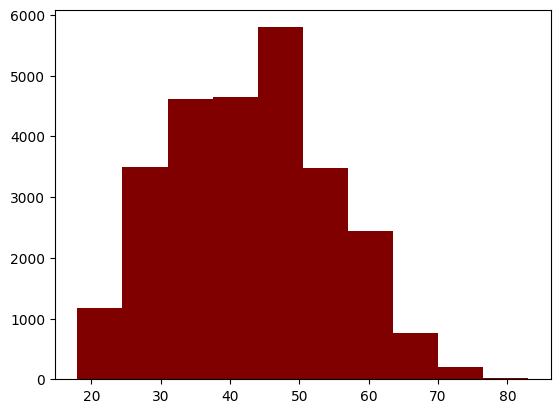

In [37]:
plt.hist(boston['Age'], color='maroon')
plt.show()

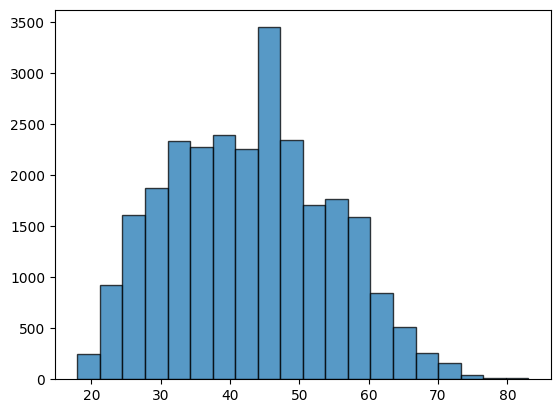

In [38]:
plt.hist(boston['Age'], bins=20, alpha=0.75, ec='black')
plt.show()

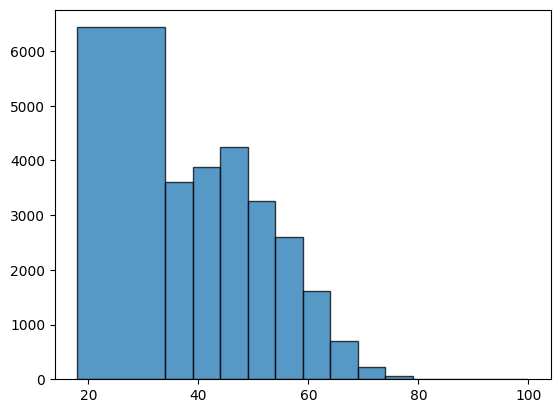

In [39]:
plt.hist(boston['Age'], bins=[18,34,39,44,49,54,59,64,69,74,79,100], alpha=0.75, ec='black')
plt.show()

## Part 1.4: Other Cool Graphs

### Part 1.4.1: Bar Charts

Bar charts and histograms are very similar, but they deal with different types of bins. Histograms are split by numerical bins, while bar charts are split by categorical bins.

Index(['United States', 'Kenya', 'Japan', 'Ethiopia', 'Eritrea', 'Morocco',
       'United Kingdom'],
      dtype='object')


<BarContainer object of 7 artists>

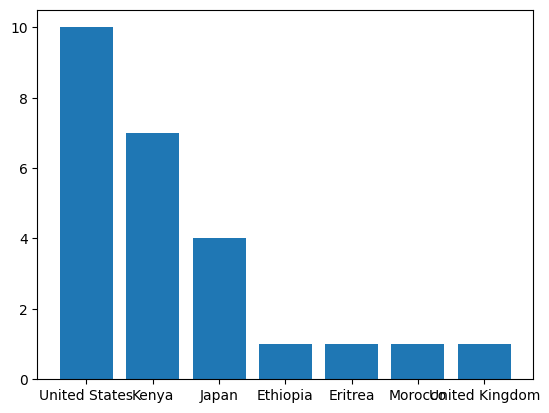

In [40]:
top25count = boston['Country'].iloc[:25].value_counts()
print(top25count.index)
plt.bar(top25count.index, top25count)

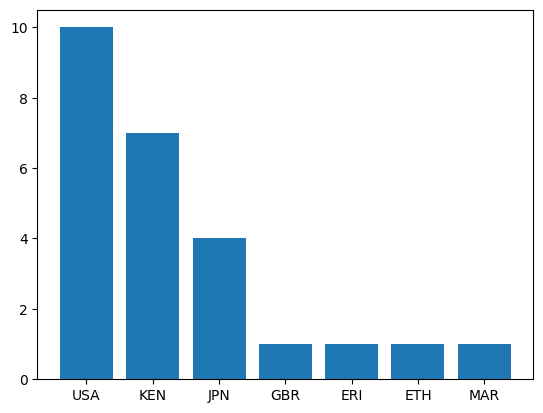

In [41]:
plt.bar(top25count.index, top25count)
plt.xticks(top25count.index, ['USA', 'KEN', 'JPN', 'GBR', 'ERI', 'ETH', 'MAR'])
plt.show()

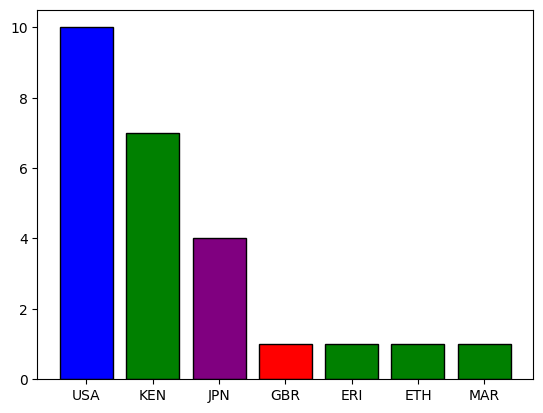

In [42]:
color_list = ['blue', 'green', 'purple', 'red', 'green', 'green', 'green']
plt.bar(top25count.index, top25count, color=color_list, edgecolor='black')
plt.xticks(top25count.index, ['USA', 'KEN', 'JPN', 'GBR', 'ERI', 'ETH', 'MAR'])
plt.show()

### Part 1.4.2: Pie Charts

Let's say we want to find the percentage of men versus women who completed the Boston Marathon in 2019. How would we go about that? Well, a first attempt might look something like this:

ValueError: ignored

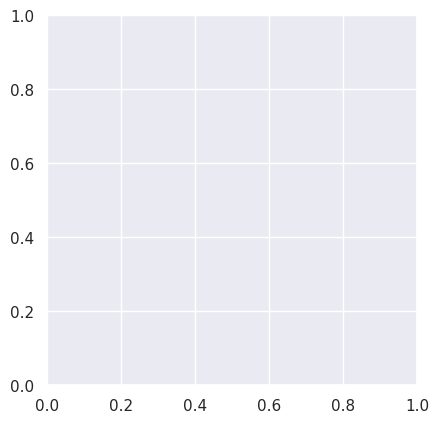

In [118]:
plt.pie(boston['Gender'])
plt.show()

...yeah, that's a no go. The reason our code wasn't able to handle that was because we did not make the distinction that we wanted to count the different categories in our code. Sure, this does sound pretty silly, but think about it for a second: .

The way we can go about getting an array that counts the unique values is by using ```.value_counts()```.

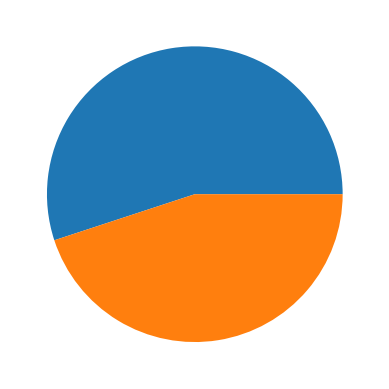

In [85]:
plt.pie(boston['Gender'].value_counts())
#print(boston['Gender'].value_counts())
plt.show()

Ok, now we have a pie chart, but this tells us basically nothing. It looks more like a sand dune during the day than it does a pie chart, and we have little context for this: we don't know what this is about, there's no title, there's no legend, no percentages - point is, this fails at being a good pie chart.

What can we do to fix it? For starters, giving it some labels and a title would be nice. We can do this by adding ```labels``` as a parameter, and call ```.title()``` to assign a proper title.

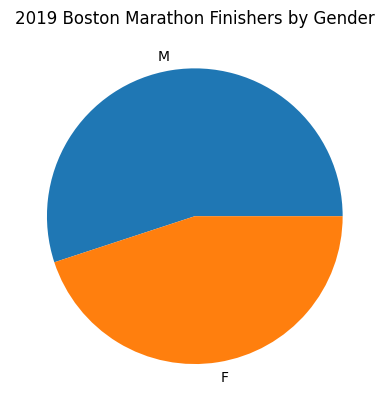

In [86]:
gender = boston['Gender'].value_counts()
gender_labels = ['M', 'F']
plt.pie(gender, labels=gender_labels)
plt.title("2019 Boston Marathon Finishers by Gender")
plt.show()

This looks way better, but we can still do more. For instnace, while we now know more men have completed the 2019 Boston Marathon than women, we still don't know the overall percentage. We know it's greater than 50%, but what is it exactly? 60%? 55%?

We can fix this by calling ```autopct``` in the parameters of ```.pie()``` to assign a percentage to the graph. We can put in a formatted string (f-string) to accurately represent this.

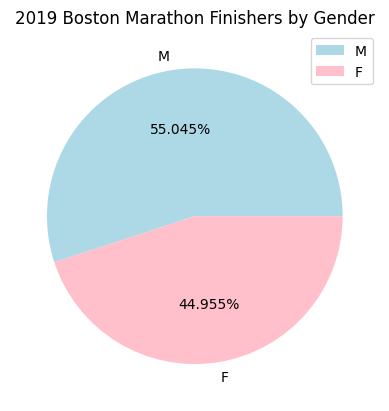

In [87]:
plt.pie(gender, labels=gender_labels, colors=['lightblue', 'pink'], autopct='%1.3f%%')
plt.title("2019 Boston Marathon Finishers by Gender")
plt.legend()
plt.show()

Now we're talking! Two more basic features of ```.pie()``` that we can go over are the ```explode``` and ```startangle``` parameters.

```explode``` takes in a tuple and for the number of distinct items in the pie chart, we can set a value to offset that specific wedge. For example, in the chart below, we can take the wedge containing the percentage of men and separate that from the rest of the wedges (or wedge, singular, in this case).

```startangle``` adjusts the possible starting angle of the data by a certain number of degrees counter-clockwise. Assuming that our starting point is due east of the pie chart (similar to a unit circle from calculus), we can call this "0 degrees"; then, we can rotate in a counter-clockwise direction for our starting angle. By default, ```startangle``` starts at 0 degrees (an example of a 35/25/25/15 pie chart with angles is displayed below).

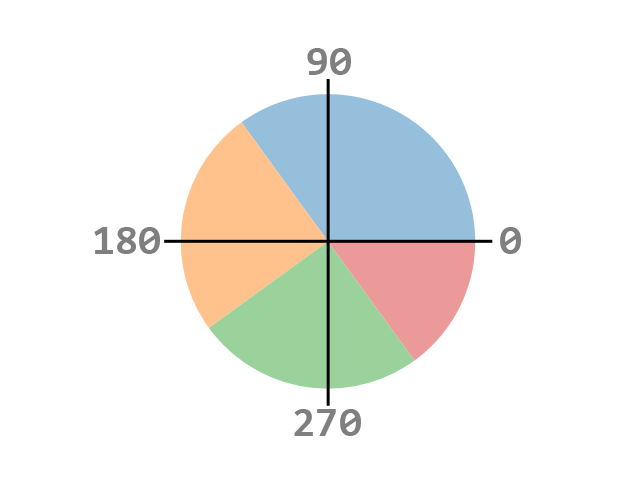

In [88]:
IPython.display.Image("img_matplotlib_pie_angles.png")

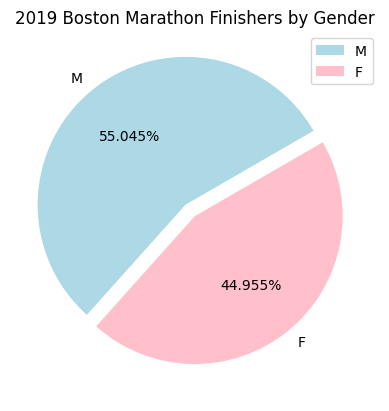

In [89]:
plt.pie(gender, labels=gender_labels, colors=['lightblue', 'pink'], autopct='%1.3f%%', explode=(0.1, 0.0), startangle=30)
plt.title("2019 Boston Marathon Finishers by Gender")
plt.legend()
plt.show()

### Part 1.4.3: Heatmaps

The following lines of code below is to get you familiarized with heatmaps. We don't anticipate on using heatmaps often for this project, but this is still something really interesting that I think is worth pointing out. This example is pulled straight from the Matplotlib documentation, so if you're interested, go checkout their page on heatmaps.

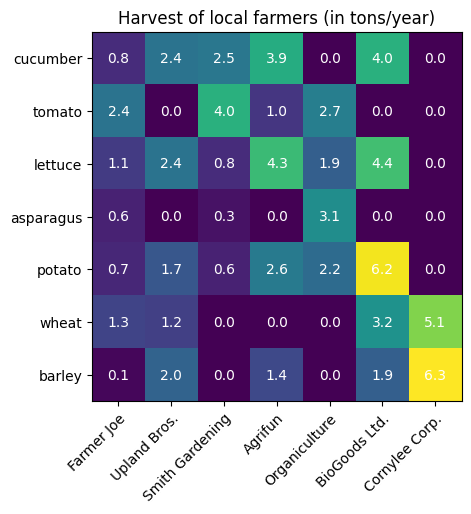

In [90]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)))
ax.set_xticklabels(farmers)
ax.set_yticks(np.arange(len(vegetables)))
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
plt.show()

## Part 1.5: Exercises

**Exercise 1**: Create a plot that looks like the one below. Note the color of the line, axis limits, and title names.

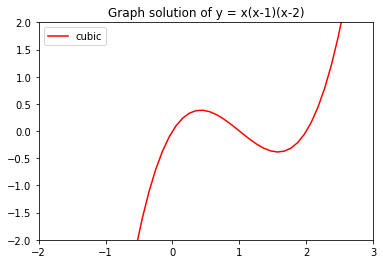

In [91]:
IPython.display.Image('excercise1.png')

In [92]:
x = np.linspace(-5, 5, 100)
y = x * (x - 1) * (x - 2)

**Exercise 2**: Using the 2019 Boston Marathon dataset, create a histogram of all of the American runners, separated by age group. Group them into the following eight bins: under 20 years, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, and over 80 years.

You are not given a visual example this time around. Try to visualize the graph in your head, including the title and x/y-labels. Once you have that implemented, did the graph you have in mind look similar to the actual results? Why or why not?

### Answers

**Exercise 1**

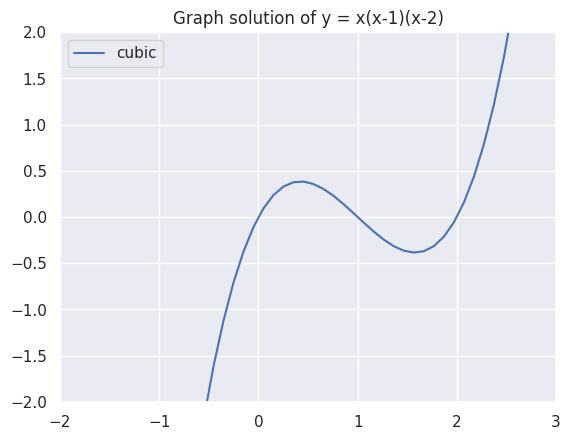

In [126]:
x = np.linspace(-5, 5, 100)
y = x * (x - 1) * (x - 2)

plt.plot(x, y, label="cubic")
plt.legend()
plt.title("Graph solution of y = x(x-1)(x-2)")
plt.xlim([-2, 3])
plt.ylim([-2, 2])
plt.show()

**Exercise 2**

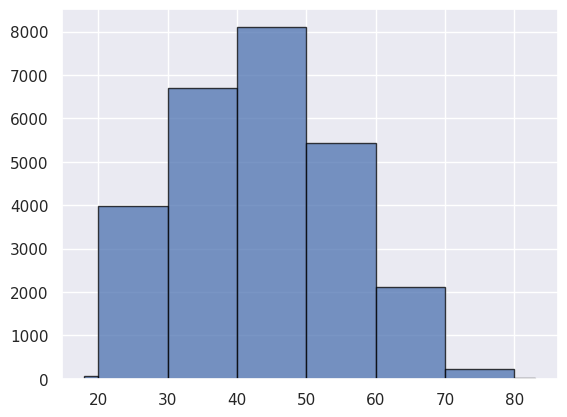

In [131]:
bins = [min(boston['Age']), 20, 30, 40, 50, 60, 70, 80, max(boston['Age'])]
plt.hist(boston['Age'], bins=bins, alpha=0.75, ec='black')
plt.show()

# Part 2: Seaborn

Seaborn is a great data visualization library in Python that provides a high-level interface for making beautiful plots in less or more intuitive code.

There are some general steps to making a basic plot in Seaborn:
* Step 1: Load in data
* Step 2: Choose figure aesthetics
* Step 3: Choose a plot type
* Step 4: Plot customization

These steps of course get more complicated as we make more complex plots, but let's start with the basics for now.

### **Step 0**: Import all necessary libraries

Before we can do anything with data, we need to import all the libraries we'll be using first (this is good practice!). We'll be using **pandas**, **matplotlib.pyplot**, and **seaborn**. Since this notebook will use data on a Google drive, we'll also use **drive** from the **google.colab** library. We'll give each library its industry standard alias as well.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/Shareddrives/ADSC TAMU Dining/Dummy Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/Shareddrives/ADSC TAMU Dining/Dummy Data'
/content/drive/My Drive/Colab Notebooks/ADSC Workshops/Visualization


### **Step 1**: Load our Data

Let's use pandas (pd) to read in and manipulate our data

In [94]:
grades = pd.read_csv('2009Grade.csv')
# Let's see what data we're working with!
print(grades.head())

   ID        Mid1    Mid2       Final         HW      Score Grade
0   1   91.666667   86.25   74.285714  33.425926  71.407077     C
1   2  100.000000   95.00   88.571429  88.491508  93.015734     A
2   3   88.888889  102.50  100.000000  84.387372  93.944065     A
3   4   83.333333   70.00   71.428571  59.994402  71.189077     C
4   5   91.666667   90.00   77.142857  25.766178  71.143926     C


### **Step 2**: Choose figure aesthetics

Seaborn has many styles to choose from. We'll explore more later, but let's use the default styling for now. This includes a grey grid called ```darkgrid```, 4 spines (borders of the figure), and the ```notebook``` style.

In [95]:
sns.set() # Set the default seaborn style

### **Step 3**: Choose a plot type

Seaborn offers many visualization types of plots, but let's start with a simple boxplot to build up from the basics first.

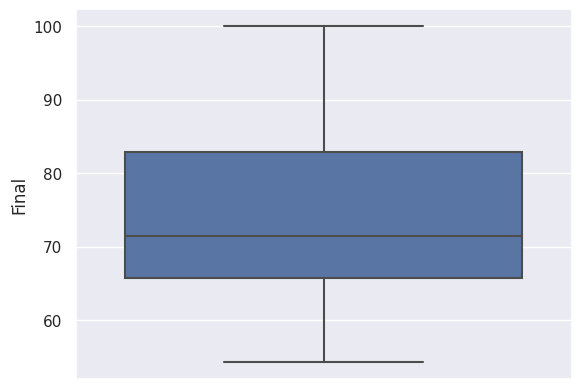

In [96]:
# Boxplot
b1 = sns.boxplot(data = grades, y = "Final", flierprops = {"marker": "x"})

While a boxplot is useful on it's own, we may find it more useful to separate a particular variable by some grouping. This is especially true for stratified data.

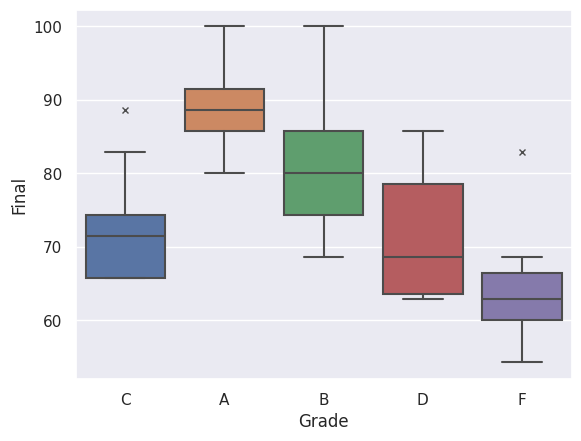

In [97]:
# Separated by letter grade
b2 = sns.boxplot(data = grades, x = "Grade", y = "Final", flierprops = {"marker": "x"}) # No custom colors

### **Step 4**: Plot Customization

Seaborn also allows us to pick our own color palette as well if we don't like their default colors. Here I defined a list of colors in their HEX code form (from the internet) to use in plots.

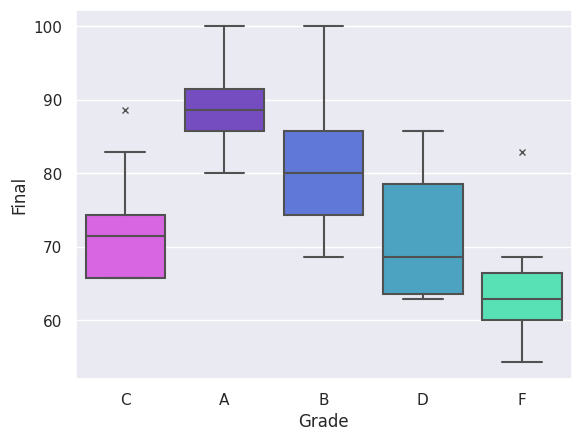

In [98]:
my_colors = ["#E951F5", "#7139D4", "#4C6CEB", "#39ADD4",
             "#43F7BE", "#F57F47", "#D43431"]

# Custom Colors
b3 = sns.boxplot(data = grades, x = "Grade", y = "Final", flierprops = {"marker": "x"}, palette = my_colors)

Notice that I've been using matplotlib.pyplot as ```plt``` in my code so far. We can use ```plt``` on top of ```sns``` because seaborn was built based on matplotlib! Seasborn also integrates well with panda data structures, so it is worthwhile to consider the possibilities available to you with these 3 libraries alone. Let's customize our plot further with ```plt```:

Text(0, 0.5, 'Final Exam Grade')

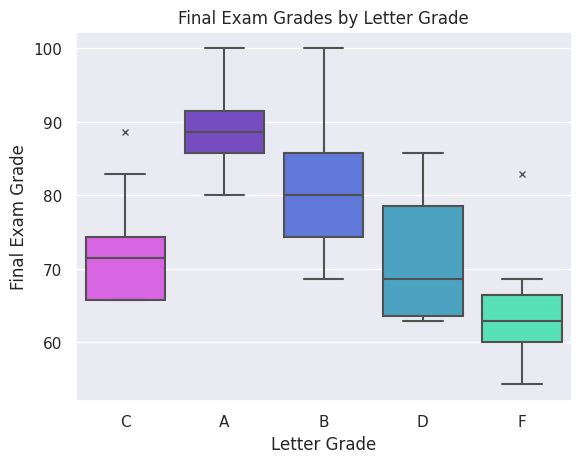

In [99]:
# Label customiation using Matplotlib Pyplot
b4 = sns.boxplot(data = grades, x = "Grade", y = "Final", flierprops = {"marker": "x"}, palette = my_colors)
plt.title("Final Exam Grades by Letter Grade")
plt.xlabel("Letter Grade")
plt.ylabel("Final Exam Grade")
#plt.ylim(50, 100)

We can also save seaborn plots the same way we'd save matplotlib plots:

In [100]:
# Saving our b4 plot
b4_fig = b4.get_figure() # Get the figure in a variable
b4_fig.savefig("grade_boxplot_transparent.png", transparent = True) # Save as a transparent plot
b4_fig.savefig("grade_boxplot.png") # Save as a white background plot

### **More Plot Types**

Seaborn offers a variety of plotting types that build on matplotlib:
* Scatterplot
* Line plot
* Bar plot
* Swarm plot
* Box plot
* Violin plot
* Histogram Plot
* Joint plot
* Pair plot
* More...

And to plot these, we're going to use datasets built-in to seaborn now as well!

In [101]:
# List of all Seaborn Datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [102]:
# New dataset from Seaborn
restaurant = sns.load_dataset('tips')
print(restaurant.info()) # View the structure of the data frame, built with pandas!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [103]:
print(restaurant.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### **Histogram**

Text(0.5, 1.0, 'Total Bill')

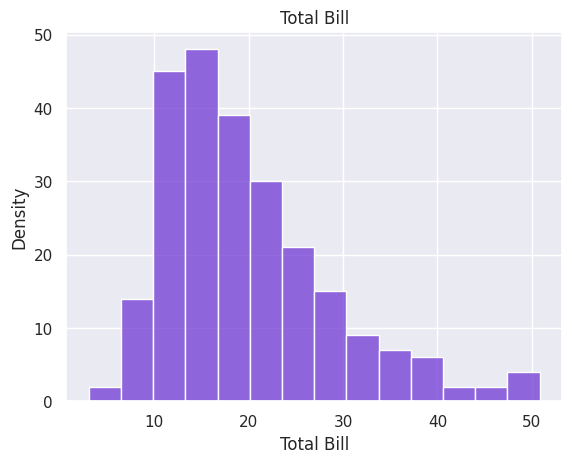

In [104]:
plt.clf() # Clear previous figure
swrm = sns.histplot(data = restaurant, x = "total_bill", color = my_colors[1])
plt.xlabel("Total Bill")
plt.ylabel("Density")
plt.title("Total Bill")

Text(0.5, 1.0, 'Total Bill Density')

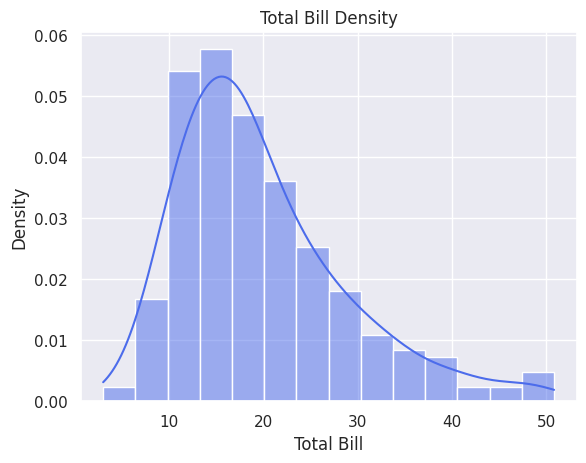

In [105]:
plt.clf() # Clear previous figure
hist1 = sns.histplot(data = restaurant, x = "total_bill", color = my_colors[2],
                     stat = "density", # Total area of bars is now 1
                     kde = True) # Kernel Density Est.
plt.xlabel("Total Bill")
plt.title("Total Bill Density")

### **Swarm Plot**

Text(0.5, 1.0, 'Tips by Gender')

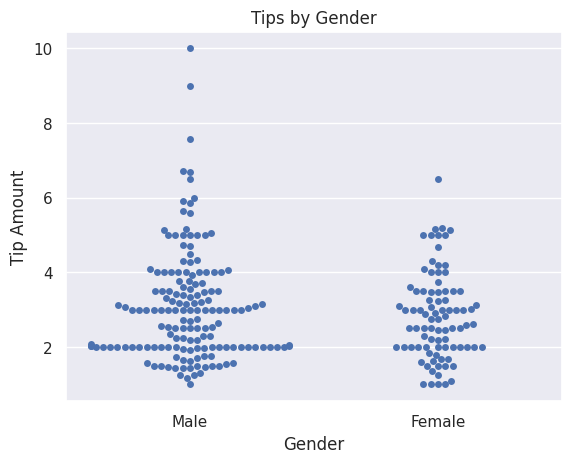

In [106]:
plt.clf() # Clear previous figure
swrm = sns.swarmplot(data = restaurant, x = "sex", y = "tip")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.title("Tips by Gender")

### **Violin Plot**

Text(0.5, 1.0, 'Tips by Gender')

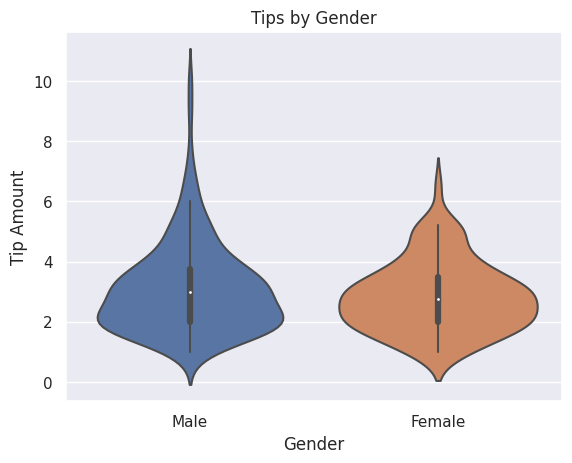

In [107]:
plt.clf() # Clear previous figure
violin = sns.violinplot(data = restaurant, x = "sex", y = "tip")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.title("Tips by Gender")

### **Scatter Plot**

Text(0.5, 1.0, 'Total Bill vs. Tips')

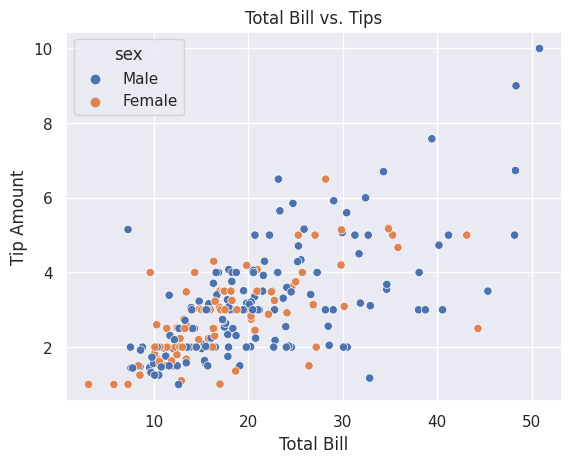

In [108]:
plt.clf() # Clear previous figure
scttr = sns.scatterplot(data = restaurant, x = "total_bill", y = "tip", hue = "sex") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

### **Using Correlation**

In [109]:
restaurant.corr()['total_bill']['tip'] # r, not r^2

<ipython-input-109-fd6142dcae04>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  restaurant.corr()['total_bill']['tip'] # r, not r^2


0.6757341092113648

Text(0.5, 1.0, 'Total Bill vs. Tips')

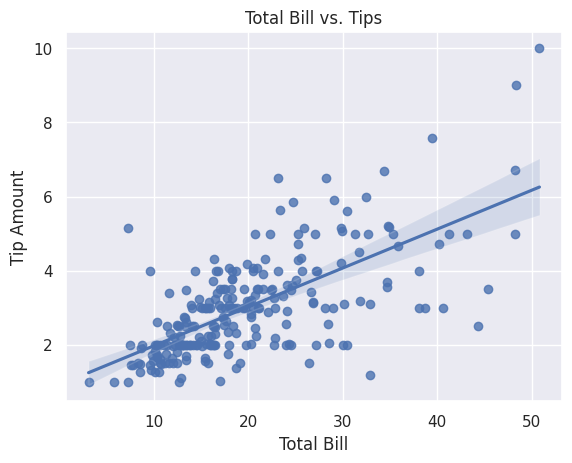

In [110]:
plt.clf() # Clear previous figure
reg = sns.regplot(data = restaurant, x = "total_bill", y = "tip") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

Text(0.5, 1.0, 'Total Bill vs. Tips')

<Figure size 640x480 with 0 Axes>

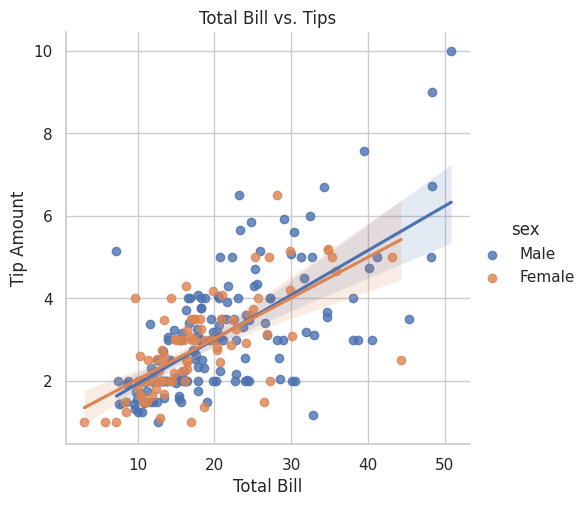

In [111]:
plt.clf() # Clear previous figure
sns.set_style('whitegrid')
reg_scttr = sns.lmplot(data = restaurant, x = "total_bill", y = "tip", hue = "sex") # Color points by gender
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.title("Total Bill vs. Tips")

### **Bar Chart**

Text(0.5, 1.0, 'Days Visited by Gender')

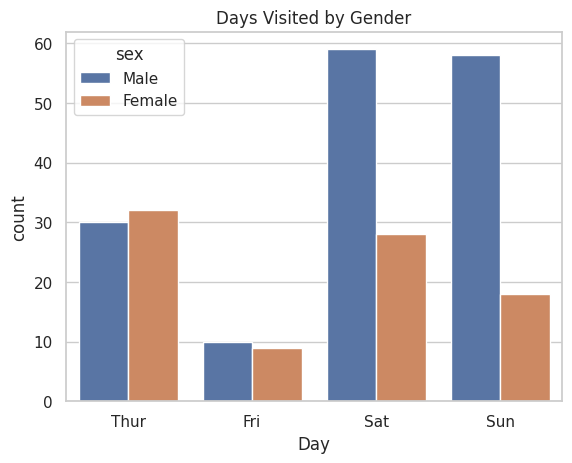

In [112]:
plt.clf() # Clear previous figure
sns.set_style('whitegrid')
restaurant = sns.load_dataset('tips')
freq_bar = sns.countplot(data = restaurant, x = 'day', hue = 'sex') # Color points by gender
plt.xlabel("Day")
plt.title("Days Visited by Gender")

### **Pie Chart**

Text(0.5, 1.0, 'Days Visited')

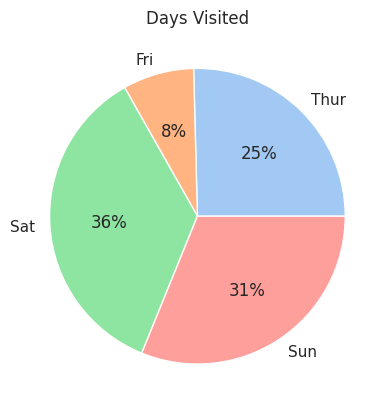

In [113]:
plt.clf() # Clear previous figure
days = restaurant.groupby('day').day.count()
new_colors = sns.color_palette('pastel')
plt.pie(days, labels = days.index, autopct='%.0f%%', colors = new_colors) # pyplot used
plt.title("Days Visited")

### **Pair Plot**

Text(0.45, 1.02, 'Pair Plot of Tips, Total Bill, and Party Size')

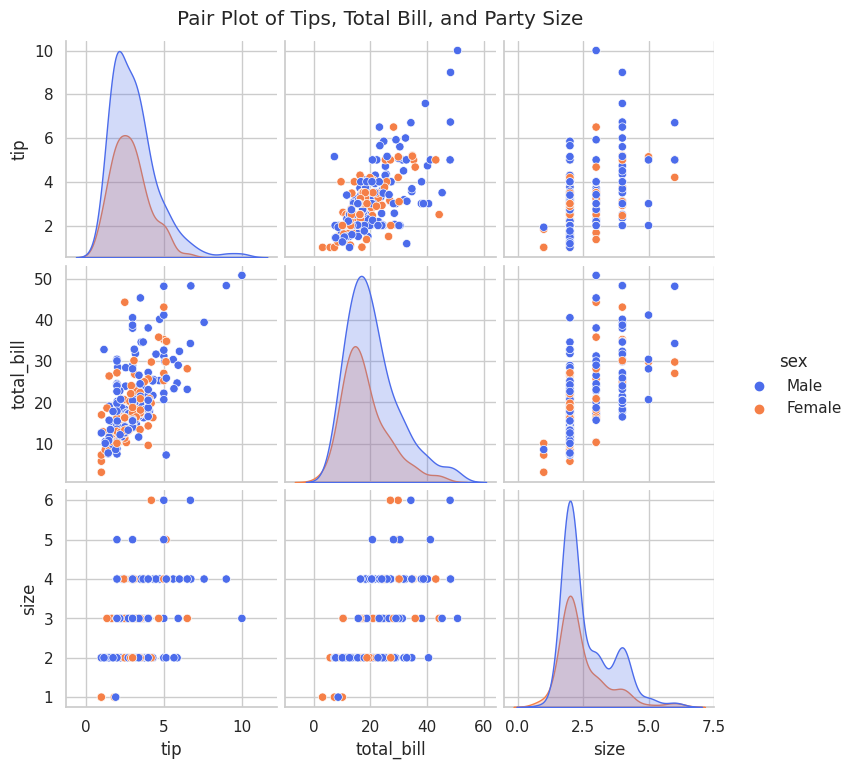

In [114]:
prp = sns.pairplot(data = restaurant,
             vars = ["tip", "total_bill", "size"],  # Data columns used
             kind = "scatter",                      # Kind of plots for different column pairs
             diag_kind = "kde",                     # Diagonal plot kind
             hue = "sex",                           # Color data by gender
             palette = my_colors[2:6:3])
plt.suptitle("Pair Plot of Tips, Total Bill, and Party Size", x = 0.45, y = 1.02)

### **Line Plot**

In [115]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Text(0.5, 1.0, 'Flights Time Series Data')

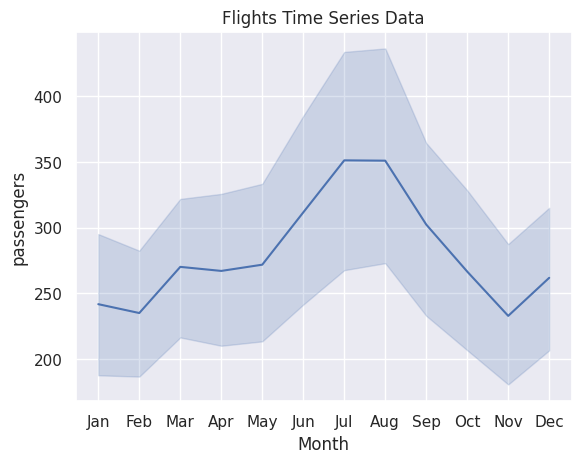

In [116]:
plt.clf() # Clear previous figure
sns.set()
time = sns.lineplot(data = flights, x = 'month', y = 'passengers')
plt.xlabel("Month")
plt.title("Flights Time Series Data")

<Figure size 640x480 with 0 Axes>

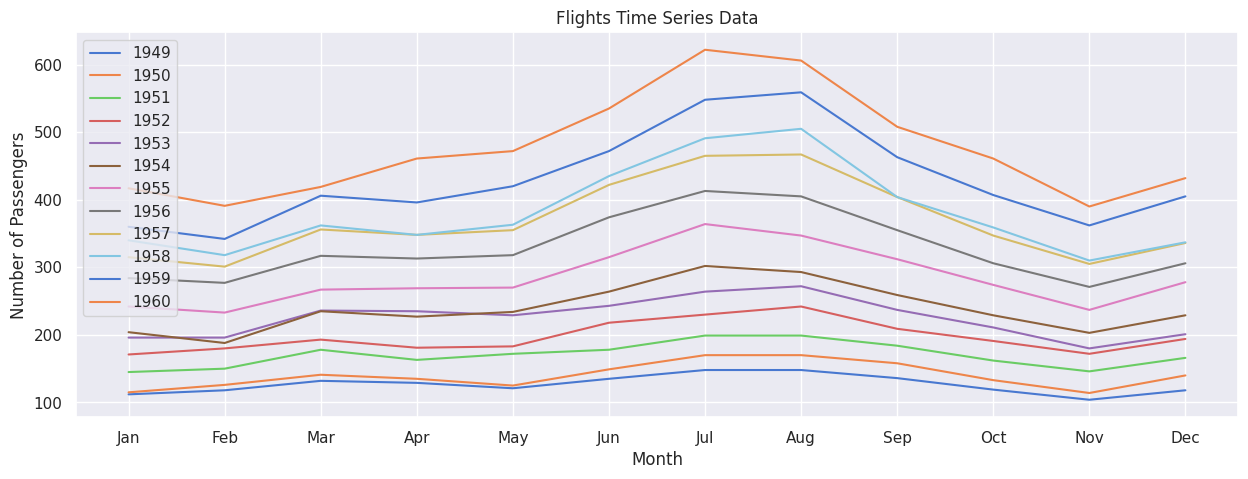

In [117]:
plt.clf() # Clear previous figure
plt.figure(figsize=(15,5))
time = sns.lineplot(data = flights, x = 'month', y = 'passengers', hue = 'year', palette = 'muted')
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.title("Flights Time Series Data")
plt.legend(loc='upper left')

### **Joint Plot**

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

In [ ]:
jnt1 = sns.jointplot(data = iris, x = "petal_width", y = "petal_length", kind = 'kde', color='r') # Kernel Density Est.
#plt.xlabel("Petal Width")
#plt.ylabel("Petal Length")
#plt.title("Joint Plot of Petal Width and Length")

In [ ]:
jnt2 = sns.jointplot(data = iris, x = "petal_width", y = "petal_length", kind = 'reg', color = 'g') # Regression

# **Advanced Plotting**

## **Subplots**

Matplotlib's may look like:

In [ ]:
# subplots
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].plot([1,2,3])
ax[0][1].pie([1,2,3])
sns.barplot(['a', 'b', 'c'], [1,2,3], ax=ax[1][0])
ax[1][1].scatter([1,2,3], [2, 3, 1])

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

Seaborn adds more functionality with ```FacetGrid()```

In [ ]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass',
                     height = 3.5, aspect = 1.6)
grid.map_dataframe(sns.histplot,
                   color = my_colors[2],
                   stat = "density", # Total area of bars is now 1
                   kde = True,
                   x = 'age')
plt.suptitle("Class vs. Survival", x = 0.5, y = 1.02)